In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import urllib.request as ur
import os

import datetime

In [2]:
# Get data updated
data = pd.read_csv('covid_19_taiwan.csv')
try:
    data.to_csv('data.csv', index=False)
    print("\n")
except:
    print("BAD", url)

In [3]:
config = {
    'days_to_forecast': 50,
    'global_degree': 5,
    'new_case_degree': 3,
    'deaths': 0,
    'start_date': datetime.date(2020,2,16),
    'today': datetime.date(2021,8,26),
    'last_day': datetime.date(2021,10,16)
}

path_img = 'img/'
path_data = 'save_data/'

In [4]:
# Define linear regression  methods
def train_model(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    return model

In [5]:
# Model predictions
def get_predictions(x, model, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    return model.predict(x_poly)

In [6]:
# Call model forecasting
def call_model(model_name, model, x, y, days_to_predict, degree):
    y_pred = np.round(get_predictions(x, model, degree), 0).astype(np.int32)

    predictions = forecast(model_name, model, degree, beginning_day=len(x), limit=days_to_predict)
    print("")
    return predictions

In [7]:
# Forecast next days
def forecast(model_name, model, degree, beginning_day=0, limit=10):
    next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
    next_days_pred = np.round(get_predictions(next_days_x, model, degree), 0).astype(np.int32)

    print("The results for " + model_name + " in the following " + str(limit) + " days is:")
    
    for i in range(0, limit):
        print(str(i + 1) + ": " + str(next_days_pred[i]))
    
    collect_predictions(next_days_pred, model_name)
    return next_days_pred

In [8]:
# Plot results
def plot_prediction(y, predictions, title):
    total_days = [datetime.date(2020, 1, 16) + datetime.timedelta(days=int(i)) for i in range(int(y.shape[0]) + predictions.shape[0])]
    #print(total_days)
    today = str(config['today'])
    last_day = str(config['last_day'])

    final_dates = []
    for i in total_days:
        i = str(i)
        final_dates.append(i[5:])
    
    #print("final_date")
    #print(final_dates)
    
    y = np.array(y)
    y = y.reshape((y.shape[0]), 1)
    predictions = np.array(predictions)
    predictions = predictions.reshape((predictions.shape[0]), 1)

    series = np.concatenate([y, predictions], axis=0)
    #print("series")
    #print(series)
   # print("y")
   # print(y.shape[0])
    
    fig, ax1 = plt.subplots(figsize=(20, 8))
    ax1.plot(final_dates[300:], series[300:], label='Predicted cases')
    ax1.plot(final_dates[300:y.shape[0]], y[300:], color='red', label='Verified cases')

    fig.autofmt_xdate()
    plt.gca().xaxis.set_major_locator(plt.LinearLocator(numticks=20))
    ax1.axvspan(today[5:], last_day[5:], alpha=0.25)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    fig.savefig(path_img + title.replace(" ", "") + ".png")


In [9]:
# Save old predictions
def collect_predictions(data, title):
    
    filename = str(config['today'] + datetime.timedelta(1))

    filename = filename.replace('-', '_')
    np.save(path_data + title.replace(" ", "") + filename + '.npy', data)



In [10]:
def load_predictions(title):
    start = config['start_date']
    today = config['today']
    predictions = [np.nan] * 21
    
    while start != today + datetime.timedelta(1):
        filename = str(start)
        to_append = np.load(path_data + title.replace(" ", "") + filename.replace('-', '_') + '.npy')
        predictions.append(to_append)
        start = start + + datetime.timedelta(1)
   
    predictions = np.array(predictions)
    print(predictions.shape)
    return predictions



In [11]:
# Arrange data and run the routine
def routine(series, title, degree):
    first_c = np.array(range(0, series.shape[0]))
    first_c = first_c.reshape((first_c.shape[0]), 1)
    series = series.reshape((series.shape[0], 1))
    series = np.concatenate([first_c, series], axis=1)
    
    x = series[:, 0].reshape(-1, 1)
    y = series[:, 1]
   
    model = train_model(x, y, degree)
    predictions = call_model(title, model, x, y, config["days_to_forecast"], degree)
    plot_prediction(y, predictions, title)
    return predictions


In [12]:
# Get series
series = pd.read_csv('data.csv')
today = str(config['today'])
today = int(today.replace('-',''))
df = series[series['date'] < today]

series_cases = df['total_cases']
series_cases = np.array(series_cases.fillna(0))

series_deaths = df['new_deaths']
series_deaths = np.array(series_deaths.fillna(0))

series_in_today = df['new_cases']
series_in_today = np.array(series_in_today.fillna(0))

partition = series_cases.shape[0]

The results for Taiwan total cases prediction in the following 50 days is:
1: 19607
2: 19759
3: 19910
4: 20062
5: 20213
6: 20364
7: 20515
8: 20666
9: 20817
10: 20968
11: 21118
12: 21269
13: 21419
14: 21568
15: 21718
16: 21867
17: 22016
18: 22164
19: 22312
20: 22460
21: 22607
22: 22754
23: 22901
24: 23047
25: 23193
26: 23338
27: 23483
28: 23627
29: 23770
30: 23913
31: 24056
32: 24197
33: 24338
34: 24479
35: 24619
36: 24758
37: 24896
38: 25034
39: 25171
40: 25307
41: 25442
42: 25577
43: 25710
44: 25843
45: 25974
46: 26105
47: 26235
48: 26364
49: 26492
50: 26619



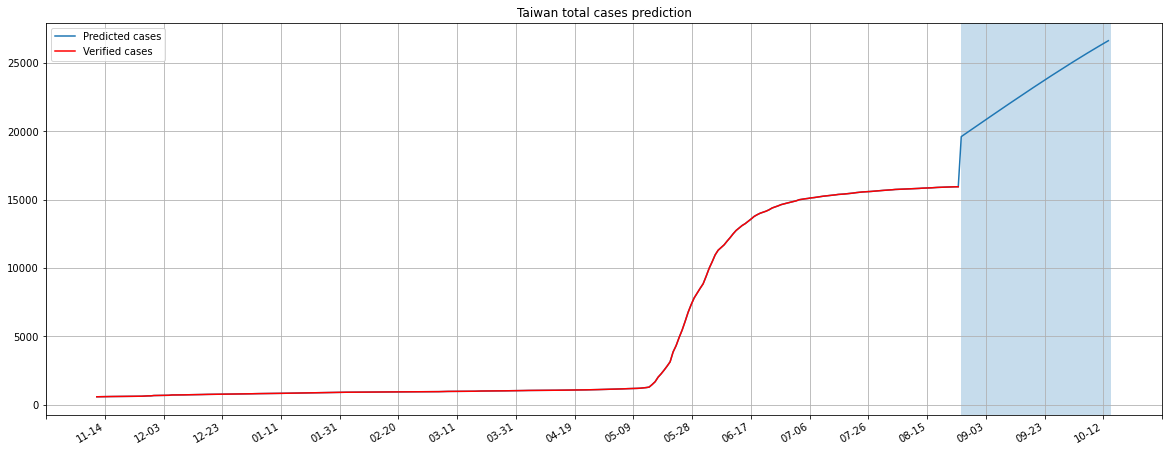

The results for Taiwan new cases in the following 50 days is:
1: 92
2: 92
3: 92
4: 93
5: 93
6: 93
7: 93
8: 93
9: 93
10: 93
11: 93
12: 93
13: 93
14: 93
15: 93
16: 93
17: 93
18: 93
19: 93
20: 93
21: 93
22: 93
23: 93
24: 93
25: 93
26: 93
27: 93
28: 93
29: 93
30: 93
31: 93
32: 93
33: 93
34: 93
35: 93
36: 93
37: 93
38: 93
39: 93
40: 92
41: 92
42: 92
43: 92
44: 92
45: 92
46: 92
47: 92
48: 92
49: 92
50: 92



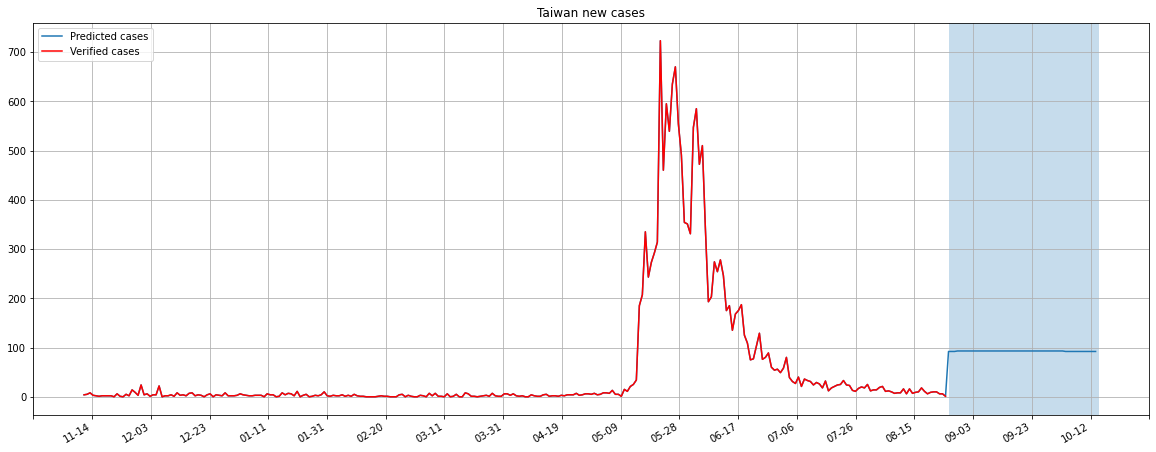

The results for Taiwan new deaths prediction in the following 50 days is:
1: 1
2: 1
3: 1
4: 1
5: 1
6: 1
7: 1
8: 1
9: 1
10: 1
11: 1
12: 1
13: 1
14: 1
15: 1
16: 1
17: 1
18: 1
19: 1
20: 1
21: 1
22: 1
23: 1
24: 1
25: 1
26: 1
27: 1
28: 1
29: 1
30: 1
31: 1
32: 1
33: 1
34: 1
35: 1
36: 1
37: 1
38: 1
39: 1
40: 1
41: 1
42: 1
43: 1
44: 1
45: 1
46: 1
47: 1
48: 1
49: 1
50: 1



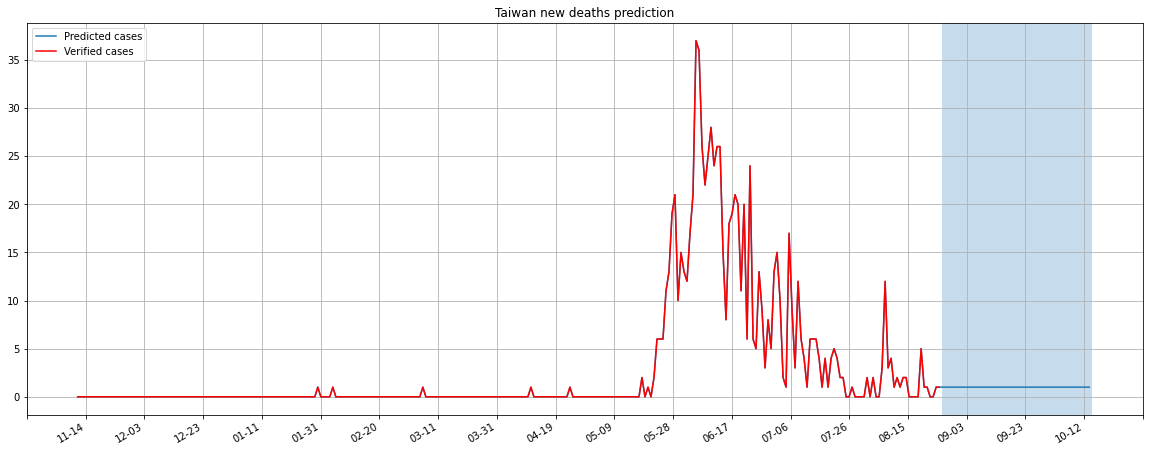

In [13]:
# Train and forecast
predictions1 = routine(series_cases[0:partition], 'Taiwan total cases prediction', config['global_degree'])
predictions2 = routine(series_in_today[0:partition], 'Taiwan new cases', config['new_case_degree'])
predictions3 = routine(series_deaths[0:partition], 'Taiwan new deaths prediction', config['deaths'])

In [14]:
def quantization(predictions, real_cases):
    eps = 1e-6
    e = (np.abs(predictions - real_cases))/(real_cases+eps)
    return e

In [15]:
#Quantization
today = str(config['today'])
today = int(today.replace('-',''))
last_day = str(config['last_day'])
last_day = int(last_day.replace('-', ''))

df = series[series['date'] < last_day]
df = df[df['date'] > today]

real_total_cases = df["total_cases"]

real_daily_cases = df["new_cases"]
real_new_deaths = df["new_deaths"]

e_total = quantization(predictions1, real_total_cases)
e_daily_cases = quantization(predictions2, real_daily_cases)
e_deaths = quantization(predictions3, real_new_deaths)

print(e_total)
print(e_daily_cases)
print(e_deaths)

589    0.228971
590    0.238033
591    0.245699
592    0.254581
593    0.263707
594    0.272670
595    0.281707
596    0.290657
597    0.300006
598    0.308946
599    0.316994
600    0.325419
601    0.334018
602    0.342797
603    0.351546
604    0.360396
605    0.368473
606    0.377245
607    0.386011
608    0.394771
609    0.402854
610    0.411276
611    0.419865
612    0.427855
613    0.436366
614    0.444898
615    0.453246
616    0.461343
617    0.469461
618    0.477844
619    0.485947
620    0.493826
621    0.501882
622    0.509558
623    0.517537
624    0.525071
625    0.532627
626    0.540554
627    0.548508
628    0.556205
629    0.564025
630    0.571938
631    0.578947
632    0.586726
633    0.594084
634    0.601043
635    0.608621
636    0.616134
637    0.623185
638    0.630567
Name: total_cases, dtype: float64
589    12.142855
590    14.333331
591     3.000000
592    10.624999
593    22.249994
594    14.499998
595    17.599996
596    14.499998
597    91.999908
598    14.499